# Linear Regression with scikit-learn
The package [scikit-learn](https://scikit-learn.org/stable/) is a widely used Python library for machine learning, built on top of NumPy and some other packages. It provides the means for preprocessing data, reducing dimensionality, implementing regression, classifying, clustering, and more. Like NumPy, scikit-learn is also open-source.
If scikit-learn is not installed, you can use the folloing code to install it.
```python
pip install scikit-learn
```

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
x = np.array([1000,1500,1200,1800,2500,800,1600]).reshape((-1,1))
y = np.array([100,290,180,180,360,120,240])

You should call `.reshape()` on x because this array must be two-dimensional, or more precisely, it must have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of `.reshape()` specifies.
The next step is to create a linear regression model and fit it using the existing data. Create an instance of the class `LinearRegression`, which will represent the regression model. With `.fit()`, you calculate the optimal values of the weights $b$ and $w$, using the existing input and output, x and y, as the arguments. In other words, `.fit()` fits the model. 

In [3]:
model = LinearRegression().fit(x,y)

Once you have your model fitted, you can get the results to check whether the model works satisfactorily and to interpret it. You can obtain the coefficient of determination, 𝑅², with `.score()` called on model.The attributes of model are `.intercept_`, which represents the coefficient $b$, and `.coef_`, which represents $w$. The result for `.intercept_` is a scalar, while `.coef_` is an array.

In [4]:
r_sq = model.score(x,y)  # coefficient of determination

print('R2:', '%.4f' %r_sq)

b = model.intercept_
w = model.coef_

print('Intercpt: %.4f' %b)
print('slope: %.4f' %w)

R2: 0.7351
Intercpt: 1.2296
slope: 0.1405


Once you have a satisfactory model, then you can use it for predictions with either existing or new data. To obtain the predicted response, use `.predict()`.

In [5]:
y_pred = model.predict(x)
print('predicted response:\n', y_pred)

predicted response:
 [141.74814815 212.00740741 169.85185185 254.16296296 352.52592593
 113.64444444 226.05925926]


Use the following code to draw data points and fitted line when there is only one independet varible.

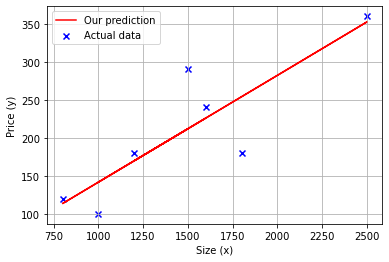

In [6]:
# If there is only one feature, you can use the following code to plot the data
plt.scatter(x,y, marker="x", c="b", label="Actual data")
plt.plot(x,y_pred, c="r", label="Our prediction")

plt.ylabel("Price (y)")
plt.xlabel("Size (x)")
plt.grid()
plt.legend()
plt.show()

## A more complicated example

With the help of `make_regression` function, we can generate a random regression dataset with a specified number of samples, features, and noise.

In [7]:
X, y = make_regression(n_samples=100, n_features=5, noise=40, random_state=14)

In [8]:
# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

In [9]:
reg = LinearRegression()  # create linear regression object
reg.fit(X_train, y_train) # train the model using the training sets

LinearRegression()

In [10]:
# regression coefficients
print(reg.coef_)
print(reg.intercept_)

[84.71245434 32.03054296 41.13695465 78.7128094  31.85010648]
-3.441734661518524


In [11]:
print('R2 =', '%.4f' %reg.score(X_test, y_test)) # Coeficient of determination

R2 = 0.9191


### Residual plots

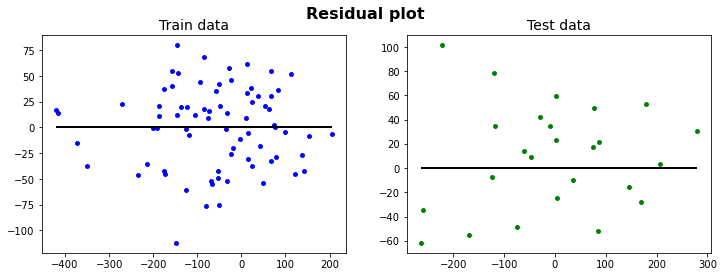

In [12]:
pred_train = reg.predict(X_train)
res_train = y_train - pred_train
min_pred_train = min(reg.predict(X_train))
max_pred_train = max(reg.predict(X_train))

pred_test = reg.predict(X_test)
res_test = y_test - pred_test
min_pred_test = min(reg.predict(X_test))
max_pred_test = max(reg.predict(X_test))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(pred_train, res_train, c='b', s=15)
plt.hlines(y = 0, xmin = min_pred_train, xmax = max_pred_train, linewidth = 2, color='k')
plt.title('Train data', size=14)

plt.subplot(1,2,2)
plt.scatter(pred_test, res_test, c='g', s=15)
plt.hlines(y = 0, xmin = min_pred_test, xmax = max_pred_test, linewidth = 2, color='k')
plt.title('Test data', size=14)

plt.suptitle('Residual plot', fontsize=16, weight='bold')
plt.show()

The resdual plots look random.